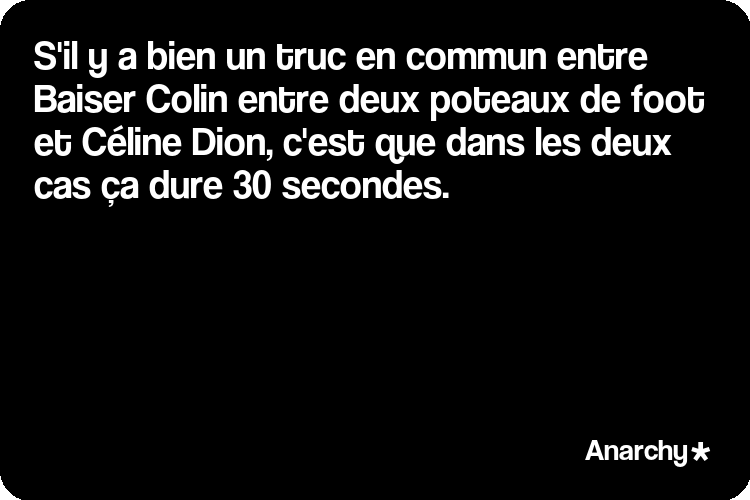

In [3]:
from PIL import Image, ImageDraw, ImageFont
import textwrap
import discord
import io

def add_corners(im, rad):
    circle = Image.new('L', (rad * 2, rad * 2), 0)
    draw = ImageDraw.Draw(circle)
    draw.ellipse((0, 0, rad * 2, rad * 2), fill=255)
    alpha = Image.new('L', im.size, "white")
    w, h = im.size
    alpha.paste(circle.crop((0, 0, rad, rad)), (0, 0))
    alpha.paste(circle.crop((0, rad, rad, rad * 2)), (0, h - rad))
    alpha.paste(circle.crop((rad, 0, rad * 2, rad)), (w - rad, 0))
    alpha.paste(circle.crop((rad, rad, rad * 2, rad * 2)), (w - rad, h - rad))
    im.putalpha(alpha)
    return im

def generate_black_card_img(text: str, horizontal: bool = True):
    imgdim = (750, 500) if horizontal else (500, 750)
    img = Image.new('RGB', imgdim, 'black')
    d = ImageDraw.Draw(img)
    font = ImageFont.truetype('cogs/packages/anarchy/assets/Coolvetica.otf', 40, encoding='unic')
    wrapped = textwrap.wrap(text, width=39 if horizontal else 24)
    
    d.text((34, 30), '\n'.join(wrapped), font=font, fill='white')
    
    logo_font = ImageFont.truetype('cogs/packages/anarchy/assets/Coolvetica.otf', 30, encoding='unic')
    d.text((imgdim[0] - 60, imgdim[1] - 70), '*', font=font, fill='white')
    d.text((imgdim[0] - 165, imgdim[1] - 70), 'Anarchy', font=logo_font, fill='white')
    
    img = add_corners(img, 30)
    return img

# Carte de fin de partie

async def generate_end_card_img(text: str):
    # userpfp = await author.display_avatar.read()
    # userpfp = Image.open(io.BytesIO(userpfp))
    userpfp = Image.open('cogs/packages/anarchy/assets/bot_image.png')
    userpfp = userpfp.resize((440, 440)).convert('RGBA')
    userpfp = add_corners(userpfp, 15)
    
    imgdim = (500, 750)
    img = Image.new('RGB', imgdim, 'white')
    d = ImageDraw.Draw(img)
    font = ImageFont.truetype('cogs/packages/anarchy/assets/Coolvetica.otf', 36, encoding='unic')
    wrapped = textwrap.wrap(text, width=28)
    
    d.text((34, 482), '\n'.join(wrapped), font=font, fill='black')
    
    logo_font = ImageFont.truetype('cogs/packages/anarchy/assets/Coolvetica.otf', 30, encoding='unic')
    d.text((imgdim[0] - 60, imgdim[1] - 70), '*', font=font, fill='black')
    d.text((imgdim[0] - 165, imgdim[1] - 70), 'Anarchy', font=logo_font, fill='black')
    
    img.paste(userpfp, (30, 32), userpfp)
    img = add_corners(img, 30)
    return img

generate_black_card_img("S'il y a bien un truc en commun entre Baiser Colin entre deux poteaux de foot et Céline Dion, c'est que dans les deux cas ça dure 30 secondes.")